In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

In [49]:
daily_df = pd.read_csv('daily_sales.csv')

day_enc = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
           'Thursday': 3, 'Friday': 4, 'Saturday': 5,
           'Sunday': 6}
day_dec = {v: k for k, v in day_enc.items()}

daily_df.rename(columns={'Unnamed: 0': 'DayOfWeek'}, inplace=True)
daily_df['DayOfWeek'] = daily_df['DayOfWeek'].apply(lambda x: day_enc[x])

print(daily_df.shape)
daily_df

(31, 17)


,DayOfWeek,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
0,4,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,9924,35967,13955,11734,35689,13499,11232
1,5,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,9028,36398,15089,8005,37178,14256,9152
2,6,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,8105,34864,13919,7011,35855,15557,8406
3,0,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,8034,36601,14528,8201,36168,15699,7940
4,1,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,9879,36661,15132,8874,36837,15420,8607
5,2,1/6/2016,38187,16386,8410,33608,14322,9652,36343,16302,9360,34374,14696,9674,37790,13810,10228
6,3,1/7/2016,38095,16045,11791,33007,15068,8985,35901,15408,8834,35895,14981,8370,36061,13436,8993
7,4,1/8/2016,34685,15058,8179,38964,13608,10985,36279,14465,10639,35441,13411,11630,34898,15544,12463
8,5,1/9/2016,35059,14585,7193,33637,14035,7616,38059,13804,8589,36194,15525,6890,37192,13619,6799
9,6,1/10/2016,36906,16905,10580,39361,14788,7105,35332,15809,7702,33847,15282,7520,35334,14447,7583


In [3]:
monthly_df = pd.read_csv('monthly_sales.csv')

month_enc = {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3,
             'May': 4, 'Jun': 5, 'Jul': 6, 'Aug': 7,
             'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}
month_dec = {v: k for k, v in month_enc.items()}

monthly_df['Month'] = monthly_df['Month, Year'].str.split('-').apply(lambda x: month_enc[x[0]])
monthly_df['Year'] = monthly_df['Month, Year'].str.split('-').apply(lambda x: x[1])

print(monthly_df.shape)
monthly_df.head()

(45, 18)


,"Month, Year",HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C,Month,Year
0,Jan-16,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,456264,273758,1126476,450958,281619,0,16
1,Feb-16,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,486254,280311,1109076,462115,288586,1,16
2,Mar-16,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,472458,295045,1167894,486622,280523,2,16
3,Apr-16,1186592,514593,296648,1213616,485843,291505,1149180,498369,299021,1133767,491684,283441,1116560,465233,290533,3,16
4,May-16,1272450,530187,305637,1249686,520702,312421,1187579,494824,296894,1215080,506283,291857,1155612,481505,300695,4,16


In [4]:
daily_hm_mask = [c for c in daily_df.columns if 'HM' in c]
daily_cf_mask = [c for c in daily_df.columns if 'CF' in c]
daily_ff_mask = [c for c in daily_df.columns if 'FF' in c]

monthly_hm_mask = [c for c in monthly_df.columns if 'HM' in c]
monthly_cf_mask = [c for c in monthly_df.columns if 'CF' in c]
monthly_ff_mask = [c for c in monthly_df.columns if 'FF' in c]

In [5]:
daily_ne_mask = [c for c in daily_df.columns if 'NE' in c]
daily_nw_mask = [c for c in daily_df.columns if 'NW' in c]
daily_se_mask = [c for c in daily_df.columns if 'SE' in c]
daily_sw_mask = [c for c in daily_df.columns if 'SW' in c]
daily_c_mask = [c for c in daily_df.columns if '-C' in c]

monthly_ne_mask = [c for c in monthly_df.columns if 'NE' in c]
monthly_nw_mask = [c for c in monthly_df.columns if 'NW' in c]
monthly_se_mask = [c for c in monthly_df.columns if 'SE' in c]
monthly_sw_mask = [c for c in monthly_df.columns if 'SW' in c]
monthly_c_mask = [c for c in monthly_df.columns if '-C' in c]

In [6]:
daily_df['Total Hamburger'] = daily_df[daily_hm_mask].sum(axis=1)
daily_df['Total Chicken Fillet'] = daily_df[daily_cf_mask].sum(axis=1)
daily_df['Total Fish Fillet'] = daily_df[daily_ff_mask].sum(axis=1)

monthly_df['Total Hamburger'] = monthly_df[monthly_hm_mask].sum(axis=1)
monthly_df['Total Chicken Fillet'] = monthly_df[monthly_cf_mask].sum(axis=1)
monthly_df['Total Fish Fillet'] = monthly_df[monthly_ff_mask].sum(axis=1)

In [7]:
regions = ['NE', 'NW', 'SE', 'SW', 'C']
burger_types = ['HM', 'CF', 'FF']

def plot_bar(category, id_var, legend_name, curr_df, curr_mask):
    if category in regions:
        df_melted = pd.melt(curr_df[curr_mask].reset_index(), id_vars=id_var,\
                                 value_vars=[burger_type + '-' + category for burger_type in burger_types],\
                                 var_name=legend_name, value_name=region + " Sales")
    else:
        df_melted = pd.melt(curr_df[curr_mask].reset_index(), id_vars=id_var,\
                                 value_vars=[category + '-' + region for region in regions],\
                                 var_name=legend_name, value_name=region + " Sales")
    sns.barplot(data=df_melted, x=id_var, y=region + ' Sales', hue=legend_name)
    return curr_df[curr_mask]

In [51]:
daily_grouped_mean = daily_df.groupby('DayOfWeek').mean().sort_index()
daily_grouped_mean

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C
DayOfWeek,,,,,,,,,,,,,,,
0,36851.75,16411.00,9284.25,34916.0,16115.00,9241.25,37262.75,15342.5,8649.75,35160.25,14291.5,8712.75,37177.75,14883.75,8863.50
1,37134.25,16027.75,9576.50,35669.0,14758.75,8891.50,36158.50,15496.5,8787.75,34840.50,15077.5,8402.50,36539.50,14164.75,8498.00
2,36671.75,16443.75,9513.75,36445.0,15202.00,9503.50,36393.75,15431.0,9328.75,35664.75,14814.5,8867.50,36129.50,14558.00,8992.00
3,36636.00,16469.50,11797.50,35963.5,14483.00,9390.75,35413.00,16250.5,9273.75,35132.75,14579.0,8802.25,36322.00,14123.00,9093.25
4,36478.20,15701.60,7634.20,37828.4,15783.60,10821.00,36121.60,15422.8,10405.60,35506.80,14695.2,11769.40,35986.00,14296.00,12136.60
5,36361.20,14994.20,7400.20,35949.2,14175.00,7992.80,35332.20,15176.4,8536.60,36173.40,14735.8,7831.40,36550.40,14779.20,8345.40
6,37516.60,15983.00,9875.60,36740.6,15308.00,7792.80,34687.40,15800.2,7806.60,34688.00,14811.8,7322.80,35823.80,14932.80,7484.40


,HM-NE,HM-SW,HM-NW,HM-SE,HM-C
DayOfWeek,,,,,
0,36851.75,34916.0,37262.75,35160.25,37177.75
1,37134.25,35669.0,36158.50,34840.50,36539.50
2,36671.75,36445.0,36393.75,35664.75,36129.50
3,36636.00,35963.5,35413.00,35132.75,36322.00
4,36478.20,37828.4,36121.60,35506.80,35986.00
5,36361.20,35949.2,35332.20,36173.40,36550.40
6,37516.60,36740.6,34687.40,34688.00,35823.80


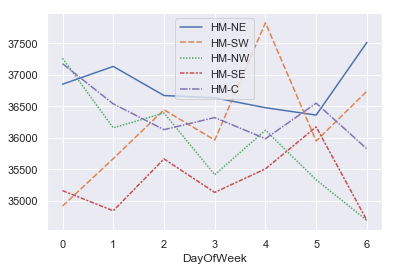

In [9]:
sns.lineplot(data=daily_grouped_mean[daily_hm_mask])
daily_grouped_mean[daily_hm_mask]

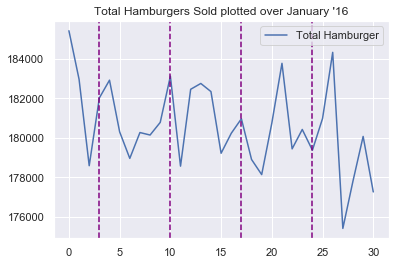

In [10]:
sns.lineplot(data=daily_df[['Total Hamburger']])\
.set_title("Total Hamburgers Sold plotted over January '16")
for i in range(3, 31, 7):
    plt.axvline(i, 0, 190000, color='purple', linestyle='--')

Text(0.5, 1.0, 'Average Number of Hamburgers Sold on each Day Of The Week')

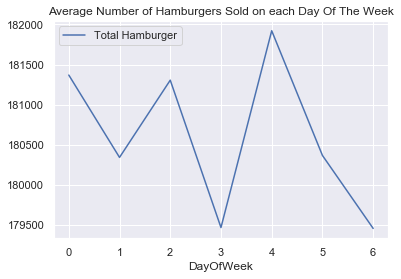

In [11]:
sns.lineplot(data=daily_grouped_mean[['Total Hamburger']])\
.set_title("Average Number of Hamburgers Sold on each Day Of The Week")

,CF-NE,CF-SW,CF-NW,CF-SE,CF-C
DayOfWeek,,,,,
0,16411.00,16115.00,15342.5,14291.5,14883.75
1,16027.75,14758.75,15496.5,15077.5,14164.75
2,16443.75,15202.00,15431.0,14814.5,14558.00
3,16469.50,14483.00,16250.5,14579.0,14123.00
4,15701.60,15783.60,15422.8,14695.2,14296.00
5,14994.20,14175.00,15176.4,14735.8,14779.20
6,15983.00,15308.00,15800.2,14811.8,14932.80


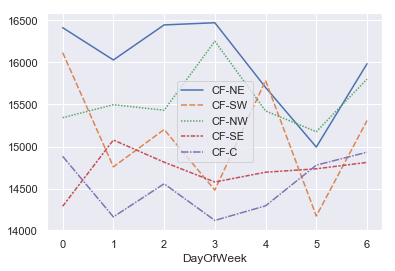

In [12]:
sns.lineplot(data=daily_grouped_mean[daily_cf_mask])
daily_grouped_mean[daily_cf_mask]

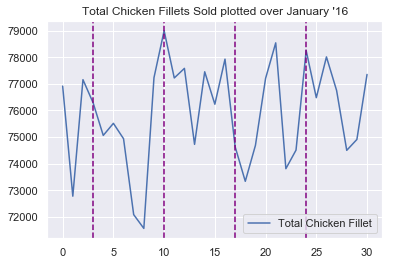

In [13]:
sns.lineplot(data=daily_df[['Total Chicken Fillet']])\
.set_title("Total Chicken Fillets Sold plotted over January '16")
for i in range(3, 31, 7):
    plt.axvline(i, 0, 80000, color='purple', linestyle='--')

Text(0.5, 1.0, 'Average Number of Chicken Fillets Sold on each Day Of The Week')

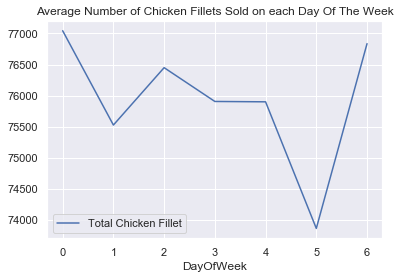

In [14]:
sns.lineplot(data=daily_grouped_mean[['Total Chicken Fillet']])\
.set_title("Average Number of Chicken Fillets Sold on each Day Of The Week")

,FF-NE,FF-SW,FF-NW,FF-SE,FF-C
DayOfWeek,,,,,
0,9284.25,9241.25,8649.75,8712.75,8863.50
1,9576.50,8891.50,8787.75,8402.50,8498.00
2,9513.75,9503.50,9328.75,8867.50,8992.00
3,11797.50,9390.75,9273.75,8802.25,9093.25
4,7634.20,10821.00,10405.60,11769.40,12136.60
5,7400.20,7992.80,8536.60,7831.40,8345.40
6,9875.60,7792.80,7806.60,7322.80,7484.40


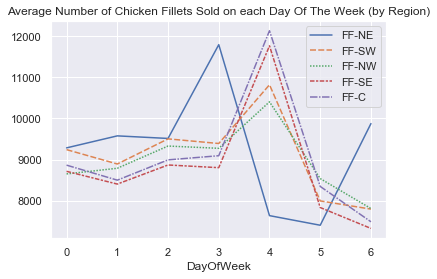

In [52]:
sns.lineplot(data=daily_grouped_mean[daily_ff_mask])\
.set_title("Average Number of Chicken Fillets Sold on each Day Of The Week (by Region)")
daily_grouped_mean[daily_ff_mask]

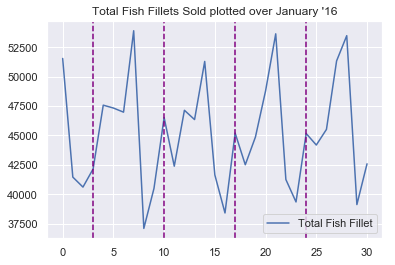

In [16]:
sns.lineplot(data=daily_df[['Total Fish Fillet']])\
.set_title("Total Fish Fillets Sold plotted over January '16")
for i in range(3, 31, 7):
    plt.axvline(i, 0, 55000, color='purple', linestyle='--')

Text(0.5, 1.0, 'Average Number of Fish Fillets Sold on each Day Of The Week')

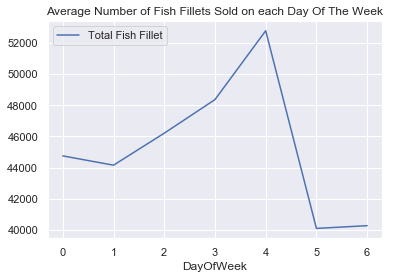

In [17]:
sns.lineplot(data=daily_df.groupby('DayOfWeek').mean().sort_index()[['Total Fish Fillet']])\
.set_title("Average Number of Fish Fillets Sold on each Day Of The Week")

,HM-NE,CF-NE,FF-NE
DayOfWeek,,,
0,36851.75,16411.00,9284.25
1,37134.25,16027.75,9576.50
2,36671.75,16443.75,9513.75
3,36636.00,16469.50,11797.50
4,36478.20,15701.60,7634.20
5,36361.20,14994.20,7400.20
6,37516.60,15983.00,9875.60


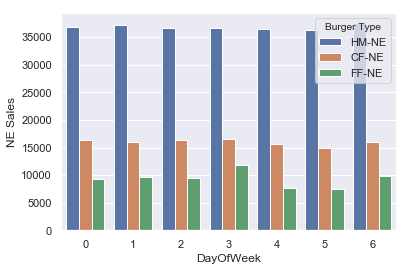

In [19]:
region = 'NE'
index_var = 'DayOfWeek'
legend_name = 'Burger Type'
curr_df = daily_grouped_mean
curr_mask = daily_ne_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-NW,CF-NW,FF-NW
DayOfWeek,,,
0,37262.75,15342.5,8649.75
1,36158.50,15496.5,8787.75
2,36393.75,15431.0,9328.75
3,35413.00,16250.5,9273.75
4,36121.60,15422.8,10405.60
5,35332.20,15176.4,8536.60
6,34687.40,15800.2,7806.60


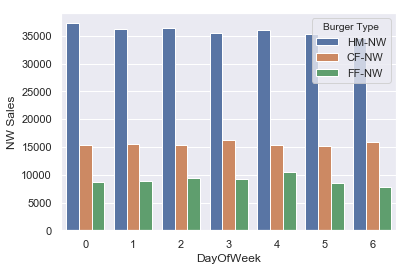

In [20]:
region = 'NW'
index_var = 'DayOfWeek'
legend_name = 'Burger Type'
curr_df = daily_grouped_mean
curr_mask = daily_nw_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-SE,CF-SE,FF-SE
DayOfWeek,,,
0,35160.25,14291.5,8712.75
1,34840.50,15077.5,8402.50
2,35664.75,14814.5,8867.50
3,35132.75,14579.0,8802.25
4,35506.80,14695.2,11769.40
5,36173.40,14735.8,7831.40
6,34688.00,14811.8,7322.80


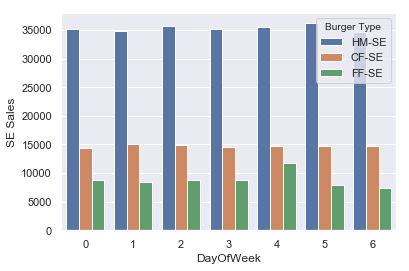

In [21]:
region = 'SE'
index_var = 'DayOfWeek'
legend_name = 'Burger Type'
curr_df = daily_grouped_mean
curr_mask = daily_se_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-SW,CF-SW,FF-SW
DayOfWeek,,,
0,34916.0,16115.00,9241.25
1,35669.0,14758.75,8891.50
2,36445.0,15202.00,9503.50
3,35963.5,14483.00,9390.75
4,37828.4,15783.60,10821.00
5,35949.2,14175.00,7992.80
6,36740.6,15308.00,7792.80


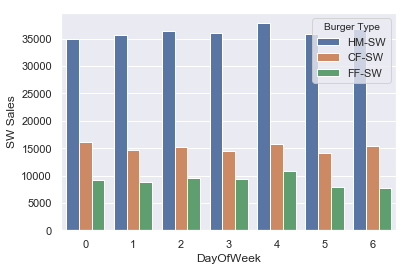

In [22]:
region = 'SW'
index_var = 'DayOfWeek'
legend_name = 'Burger Type'
curr_df = daily_grouped_mean
curr_mask = daily_sw_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-C,CF-C,FF-C
DayOfWeek,,,
0,37177.75,14883.75,8863.50
1,36539.50,14164.75,8498.00
2,36129.50,14558.00,8992.00
3,36322.00,14123.00,9093.25
4,35986.00,14296.00,12136.60
5,36550.40,14779.20,8345.40
6,35823.80,14932.80,7484.40


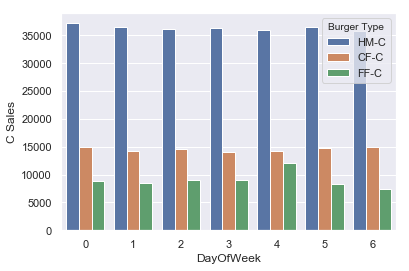

In [23]:
region = 'C'
index_var = 'DayOfWeek'
legend_name = 'Burger Type'
curr_df = daily_grouped_mean
curr_mask = daily_c_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

In [24]:
monthly_grouped_mean = monthly_df.groupby('Month').mean().sort_index()
monthly_grouped_mean

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C,Total Hamburger,Total Chicken Fillet,Total Fish Fillet
Month,,,,,,,,,,,,,,,,,,
0,1.419482e+06,589842.750000,355012.250000,1.397058e+06,581916.750000,345324.250000,1.393501e+06,585351.250000,347906.750000,1.375250e+06,565998.250000,336240.250000,1.349895e+06,557854.250000,336972.250000,6935186.50,2880963.25,1721455.75
1,1.462256e+06,609273.000000,361933.750000,1.446890e+06,591685.250000,358779.500000,1.429361e+06,578177.250000,357340.000000,1.387590e+06,578990.000000,348187.000000,1.357322e+06,565908.000000,349643.750000,7083419.00,2924033.50,1775884.00
2,1.427741e+06,589508.750000,353568.500000,1.393687e+06,586279.750000,352579.500000,1.387973e+06,571501.750000,343378.000000,1.368643e+06,564330.750000,334414.250000,1.334452e+06,561355.500000,334085.000000,6912495.75,2872976.50,1718025.25
3,1.432020e+06,595880.500000,365943.500000,1.438594e+06,588692.250000,356673.250000,1.373599e+06,582869.250000,350346.250000,1.379748e+06,573595.000000,348545.250000,1.358194e+06,565913.500000,342396.500000,6982153.75,2906950.50,1763904.75
4,1.503541e+06,627570.000000,369510.000000,1.465068e+06,603462.500000,369478.500000,1.431174e+06,595816.500000,357793.250000,1.408536e+06,593141.750000,352592.500000,1.404612e+06,586333.750000,354456.250000,7212930.75,3006324.50,1803830.50
5,1.442800e+06,613048.500000,360533.250000,1.407610e+06,587017.500000,352210.500000,1.424576e+06,582598.750000,346023.500000,1.375254e+06,562243.750000,337346.000000,1.344148e+06,566299.750000,346162.250000,6994389.00,2911208.25,1742275.50
6,1.458619e+06,601008.750000,360557.250000,1.406940e+06,599569.250000,359334.250000,1.388234e+06,585121.750000,346653.250000,1.367345e+06,568888.750000,344741.750000,1.372151e+06,566148.500000,346399.750000,6993290.25,2920737.00,1757686.25
7,1.500862e+06,626257.000000,371532.500000,1.491468e+06,634401.250000,365713.250000,1.486341e+06,613335.000000,363926.500000,1.431786e+06,609929.750000,365957.500000,1.411106e+06,605935.750000,356150.750000,7321562.25,3089858.75,1823280.50
8,1.471800e+06,613795.250000,375274.000000,1.451273e+06,610293.250000,369705.750000,1.454960e+06,588317.250000,360614.750000,1.420188e+06,604218.000000,355014.250000,1.402176e+06,591456.000000,346989.750000,7200397.75,3008079.75,1807598.50


In [25]:
three_mon_grouped_mean = monthly_df.groupby(monthly_df.index // 3).mean().sort_index()
monthly_dict = {}
curr_index = ''
count = 0
for i in monthly_df['Month, Year'].tolist():
    if not count % 3:
        curr_index = i
    elif count % 3 == 2:
        curr_index += ' to ' + i
        monthly_dict[count // 3] = curr_index
    count += 1
print(monthly_dict)
# three_mon_grouped_mean.rename(index = monthly_dict, 
#                                  inplace = True)
three_mon_grouped_mean.index.name = "Every 3 Months (Jan '16 to Sep '19)"
three_mon_grouped_mean

{0: 'Jan-16 to Mar-16', 1: 'Apr-16 to Jun-16', 2: 'Jul-16 to Sep-16', 3: 'Oct-16 to Dec-16', 4: 'Jan-17 to Mar-17', 5: 'Apr-17 to Jun-17', 6: 'Jul-17 to Sep-17', 7: 'Oct-17 to Dec-17', 8: 'Jan-18 to Mar-18', 9: 'Apr-18 to Jun-18', 10: 'Jul-18 to Sep-18', 11: 'Oct-18 to Dec-18', 12: 'Jan-19 to Mar-19', 13: 'Apr-19 to Jun-19', 14: 'Jul-19 to Sep-19'}


,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,CF-SE,FF-SE,HM-C,CF-C,FF-C,Month,Total Hamburger,Total Chicken Fillet,Total Fish Fillet
Every 3 Months (Jan '16 to Sep '19),,,,,,,,,,,,,,,,,,,
0,1.184160e+06,493136.000000,292000.333333,1.181859e+06,485902.000000,287552.666667,1.150437e+06,485708.333333,287609.000000,1.131981e+06,471658.666667,283038.000000,1.134482e+06,466565.000000,283576.000000,1.0,5.782919e+06,2.402970e+06,1.433776e+06
1,1.231356e+06,526792.333333,307881.000000,1.225737e+06,504113.333333,302467.666667,1.192181e+06,496504.000000,297902.000000,1.188855e+06,495150.666667,289263.000000,1.140615e+06,475256.000000,296792.333333,4.0,5.978743e+06,2.497816e+06,1.494306e+06
2,1.297400e+06,540583.000000,328718.666667,1.298827e+06,534263.000000,324583.666667,1.260380e+06,518104.333333,314951.000000,1.261600e+06,518481.333333,311088.333333,1.243034e+06,518195.333333,315019.333333,7.0,6.361240e+06,2.629627e+06,1.594361e+06
3,1.293235e+06,553583.333333,332150.000000,1.323376e+06,537127.666667,326574.000000,1.288531e+06,530024.000000,318014.333333,1.252489e+06,535993.000000,321595.666667,1.233764e+06,513931.333333,312568.000000,10.0,6.391395e+06,2.670659e+06,1.610902e+06
4,1.414320e+06,597128.333333,353437.333333,1.388743e+06,586341.333333,351804.333333,1.387570e+06,562785.000000,351453.333333,1.366885e+06,569342.000000,332622.666667,1.328059e+06,553217.333333,340850.333333,1.0,6.885576e+06,2.868814e+06,1.730168e+06
5,1.463350e+06,593921.666667,356161.666667,1.425934e+06,578438.000000,356419.000000,1.379651e+06,590140.666667,340198.333333,1.375701e+06,558068.333333,343864.333333,1.353816e+06,564189.333333,343028.000000,4.0,6.998453e+06,2.884758e+06,1.739671e+06
6,1.493630e+06,622017.000000,368380.333333,1.471602e+06,629349.000000,367534.333333,1.446175e+06,610326.666667,366420.666667,1.419401e+06,607235.666667,359544.333333,1.399736e+06,591336.000000,354545.666667,7.0,7.230544e+06,3.060264e+06,1.816425e+06
7,1.542597e+06,642748.333333,385648.666667,1.520537e+06,616602.000000,385061.333333,1.497176e+06,624230.333333,369572.000000,1.459499e+06,607696.000000,369770.000000,1.455992e+06,598626.333333,368672.666667,10.0,7.475801e+06,3.089903e+06,1.878725e+06
8,1.612798e+06,671999.000000,403409.000000,1.585638e+06,643475.333333,391156.000000,1.586477e+06,652095.666667,391433.333333,1.541739e+06,642594.333333,380625.000000,1.517449e+06,624172.000000,379466.666667,1.0,7.844101e+06,3.234336e+06,1.946090e+06


,HM-NE,HM-SW,HM-NW,HM-SE,HM-C
Month,,,,,
0,1.419482e+06,1.397058e+06,1.393501e+06,1.375250e+06,1.349895e+06
1,1.462256e+06,1.446890e+06,1.429361e+06,1.387590e+06,1.357322e+06
2,1.427741e+06,1.393687e+06,1.387973e+06,1.368643e+06,1.334452e+06
3,1.432020e+06,1.438594e+06,1.373599e+06,1.379748e+06,1.358194e+06
4,1.503541e+06,1.465068e+06,1.431174e+06,1.408536e+06,1.404612e+06
5,1.442800e+06,1.407610e+06,1.424576e+06,1.375254e+06,1.344148e+06
6,1.458619e+06,1.406940e+06,1.388234e+06,1.367345e+06,1.372151e+06
7,1.500862e+06,1.491468e+06,1.486341e+06,1.431786e+06,1.411106e+06
8,1.471800e+06,1.451273e+06,1.454960e+06,1.420188e+06,1.402176e+06


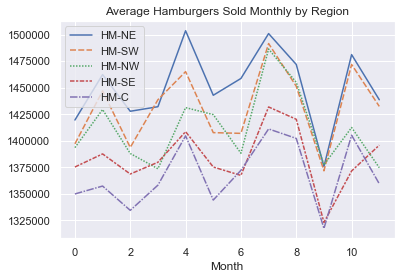

In [26]:
sns.lineplot(data=monthly_grouped_mean[monthly_hm_mask])\
.set_title("Average Hamburgers Sold Monthly by Region")
monthly_grouped_mean[monthly_hm_mask]

,CF-NE,CF-SW,CF-NW,CF-SE,CF-C
Month,,,,,
0,589842.750000,581916.750000,585351.250000,565998.250000,557854.250000
1,609273.000000,591685.250000,578177.250000,578990.000000,565908.000000
2,589508.750000,586279.750000,571501.750000,564330.750000,561355.500000
3,595880.500000,588692.250000,582869.250000,573595.000000,565913.500000
4,627570.000000,603462.500000,595816.500000,593141.750000,586333.750000
5,613048.500000,587017.500000,582598.750000,562243.750000,566299.750000
6,601008.750000,599569.250000,585121.750000,568888.750000,566148.500000
7,626257.000000,634401.250000,613335.000000,609929.750000,605935.750000
8,613795.250000,610293.250000,588317.250000,604218.000000,591456.000000


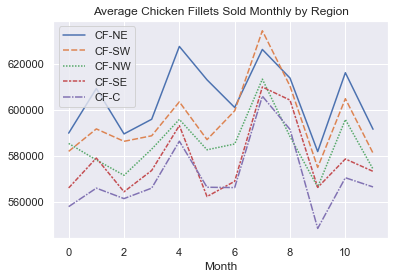

In [27]:
sns.lineplot(data=monthly_grouped_mean[monthly_cf_mask])\
.set_title("Average Chicken Fillets Sold Monthly by Region")
monthly_grouped_mean[monthly_cf_mask]

,FF-NE,FF-SW,FF-NW,FF-SE,FF-C
Month,,,,,
0,355012.250000,345324.250000,347906.750000,336240.250000,336972.250000
1,361933.750000,358779.500000,357340.000000,348187.000000,349643.750000
2,353568.500000,352579.500000,343378.000000,334414.250000,334085.000000
3,365943.500000,356673.250000,350346.250000,348545.250000,342396.500000
4,369510.000000,369478.500000,357793.250000,352592.500000,354456.250000
5,360533.250000,352210.500000,346023.500000,337346.000000,346162.250000
6,360557.250000,359334.250000,346653.250000,344741.750000,346399.750000
7,371532.500000,365713.250000,363926.500000,365957.500000,356150.750000
8,375274.000000,369705.750000,360614.750000,355014.250000,346989.750000


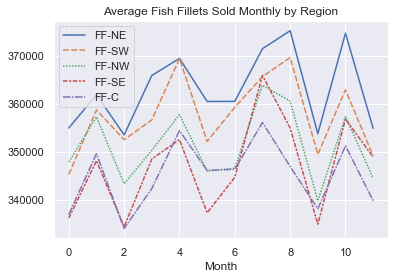

In [28]:
sns.lineplot(data=monthly_grouped_mean[monthly_ff_mask])\
.set_title("Average Fish Fillets Sold Monthly by Region")
monthly_grouped_mean[monthly_ff_mask]

,HM-NE,CF-NE,FF-NE
Month,,,
0,1.419482e+06,589842.750000,355012.250000
1,1.462256e+06,609273.000000,361933.750000
2,1.427741e+06,589508.750000,353568.500000
3,1.432020e+06,595880.500000,365943.500000
4,1.503541e+06,627570.000000,369510.000000
5,1.442800e+06,613048.500000,360533.250000
6,1.458619e+06,601008.750000,360557.250000
7,1.500862e+06,626257.000000,371532.500000
8,1.471800e+06,613795.250000,375274.000000


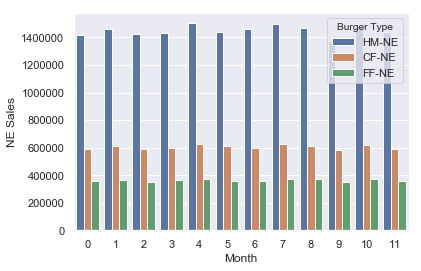

In [29]:
region = 'NE'
index_var = 'Month'
legend_name = 'Burger Type'
curr_df = monthly_grouped_mean
curr_mask = monthly_ne_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-NW,CF-NW,FF-NW
Month,,,
0,1.393501e+06,585351.250000,347906.750000
1,1.429361e+06,578177.250000,357340.000000
2,1.387973e+06,571501.750000,343378.000000
3,1.373599e+06,582869.250000,350346.250000
4,1.431174e+06,595816.500000,357793.250000
5,1.424576e+06,582598.750000,346023.500000
6,1.388234e+06,585121.750000,346653.250000
7,1.486341e+06,613335.000000,363926.500000
8,1.454960e+06,588317.250000,360614.750000


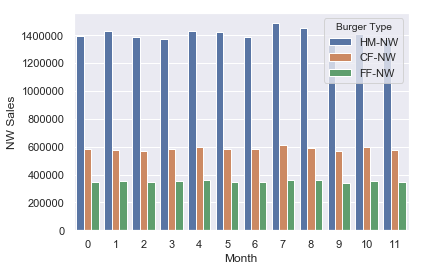

In [30]:
region = 'NW'
index_var = 'Month'
legend_name = 'Burger Type'
curr_df = monthly_grouped_mean
curr_mask = monthly_nw_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-SE,CF-SE,FF-SE
Month,,,
0,1.375250e+06,565998.250000,336240.250000
1,1.387590e+06,578990.000000,348187.000000
2,1.368643e+06,564330.750000,334414.250000
3,1.379748e+06,573595.000000,348545.250000
4,1.408536e+06,593141.750000,352592.500000
5,1.375254e+06,562243.750000,337346.000000
6,1.367345e+06,568888.750000,344741.750000
7,1.431786e+06,609929.750000,365957.500000
8,1.420188e+06,604218.000000,355014.250000


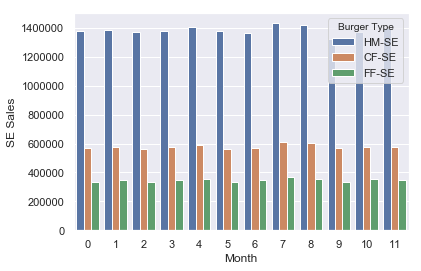

In [31]:
region = 'SE'
index_var = 'Month'
legend_name = 'Burger Type'
curr_df = monthly_grouped_mean
curr_mask = monthly_se_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-SW,CF-SW,FF-SW
Month,,,
0,1.397058e+06,581916.750000,345324.250000
1,1.446890e+06,591685.250000,358779.500000
2,1.393687e+06,586279.750000,352579.500000
3,1.438594e+06,588692.250000,356673.250000
4,1.465068e+06,603462.500000,369478.500000
5,1.407610e+06,587017.500000,352210.500000
6,1.406940e+06,599569.250000,359334.250000
7,1.491468e+06,634401.250000,365713.250000
8,1.451273e+06,610293.250000,369705.750000


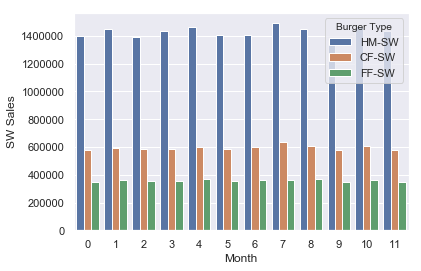

In [32]:
region = 'SW'
index_var = 'Month'
legend_name = 'Burger Type'
curr_df = monthly_grouped_mean
curr_mask = monthly_sw_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-C,CF-C,FF-C
Month,,,
0,1.349895e+06,557854.250000,336972.250000
1,1.357322e+06,565908.000000,349643.750000
2,1.334452e+06,561355.500000,334085.000000
3,1.358194e+06,565913.500000,342396.500000
4,1.404612e+06,586333.750000,354456.250000
5,1.344148e+06,566299.750000,346162.250000
6,1.372151e+06,566148.500000,346399.750000
7,1.411106e+06,605935.750000,356150.750000
8,1.402176e+06,591456.000000,346989.750000


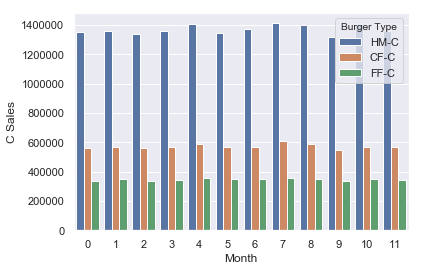

In [33]:
region = 'C'
index_var = 'Month'
legend_name = 'Burger Type'
curr_df = monthly_grouped_mean
curr_mask = monthly_c_mask
plot_bar(category=region, id_var=index_var, legend_name=legend_name,
         curr_df=curr_df, curr_mask=curr_mask)

,HM-NE,HM-SW,HM-NW,HM-SE,HM-C
Every 3 Months (Jan '16 to Sep '19),,,,,
0,1.184160e+06,1.181859e+06,1.150437e+06,1.131981e+06,1.134482e+06
1,1.231356e+06,1.225737e+06,1.192181e+06,1.188855e+06,1.140615e+06
2,1.297400e+06,1.298827e+06,1.260380e+06,1.261600e+06,1.243034e+06
3,1.293235e+06,1.323376e+06,1.288531e+06,1.252489e+06,1.233764e+06
4,1.414320e+06,1.388743e+06,1.387570e+06,1.366885e+06,1.328059e+06
5,1.463350e+06,1.425934e+06,1.379651e+06,1.375701e+06,1.353816e+06
6,1.493630e+06,1.471602e+06,1.446175e+06,1.419401e+06,1.399736e+06
7,1.542597e+06,1.520537e+06,1.497176e+06,1.459499e+06,1.455992e+06
8,1.612798e+06,1.585638e+06,1.586477e+06,1.541739e+06,1.517449e+06


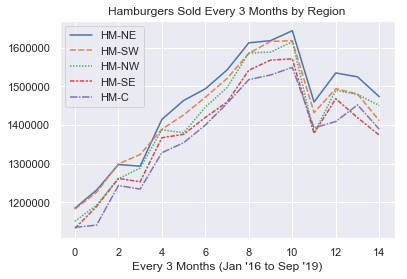

In [34]:
sns.lineplot(data=three_mon_grouped_mean[monthly_hm_mask])\
.set_title("Hamburgers Sold Every 3 Months by Region")
three_mon_grouped_mean[monthly_hm_mask]

,CF-NE,CF-SW,CF-NW,CF-SE,CF-C
Every 3 Months (Jan '16 to Sep '19),,,,,
0,493136.000000,485902.000000,485708.333333,471658.666667,466565.000000
1,526792.333333,504113.333333,496504.000000,495150.666667,475256.000000
2,540583.000000,534263.000000,518104.333333,518481.333333,518195.333333
3,553583.333333,537127.666667,530024.000000,535993.000000,513931.333333
4,597128.333333,586341.333333,562785.000000,569342.000000,553217.333333
5,593921.666667,578438.000000,590140.666667,558068.333333,564189.333333
6,622017.000000,629349.000000,610326.666667,607235.666667,591336.000000
7,642748.333333,616602.000000,624230.333333,607696.000000,598626.333333
8,671999.000000,643475.333333,652095.666667,642594.333333,624172.000000


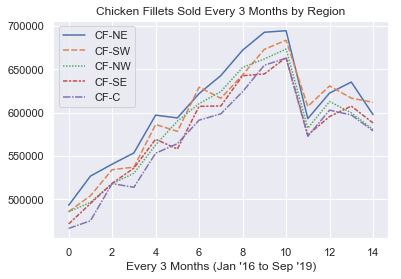

In [35]:
sns.lineplot(data=three_mon_grouped_mean[monthly_cf_mask])\
.set_title("Chicken Fillets Sold Every 3 Months by Region")
three_mon_grouped_mean[monthly_cf_mask]

,FF-NE,FF-SW,FF-NW,FF-SE,FF-C
Every 3 Months (Jan '16 to Sep '19),,,,,
0,292000.333333,287552.666667,287609.000000,283038.000000,283576.000000
1,307881.000000,302467.666667,297902.000000,289263.000000,296792.333333
2,328718.666667,324583.666667,314951.000000,311088.333333,315019.333333
3,332150.000000,326574.000000,318014.333333,321595.666667,312568.000000
4,353437.333333,351804.333333,351453.333333,332622.666667,340850.333333
5,356161.666667,356419.000000,340198.333333,343864.333333,343028.000000
6,368380.333333,367534.333333,366420.666667,359544.333333,354545.666667
7,385648.666667,385061.333333,369572.000000,369770.000000,368672.666667
8,403409.000000,391156.000000,391433.333333,380625.000000,379466.666667


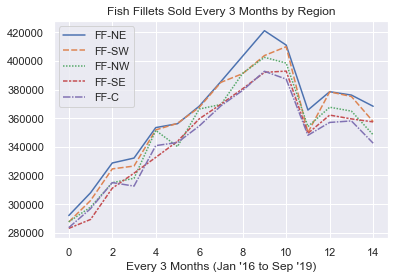

In [36]:
sns.lineplot(data=three_mon_grouped_mean[monthly_ff_mask])\
.set_title("Fish Fillets Sold Every 3 Months by Region")
three_mon_grouped_mean[monthly_ff_mask]

,HM-NE,CF-NE,FF-NE
Every 3 Months (Jan '16 to Sep '19),,,
0,1.184160e+06,493136.000000,292000.333333
1,1.231356e+06,526792.333333,307881.000000
2,1.297400e+06,540583.000000,328718.666667
3,1.293235e+06,553583.333333,332150.000000
4,1.414320e+06,597128.333333,353437.333333
5,1.463350e+06,593921.666667,356161.666667
6,1.493630e+06,622017.000000,368380.333333
7,1.542597e+06,642748.333333,385648.666667
8,1.612798e+06,671999.000000,403409.000000


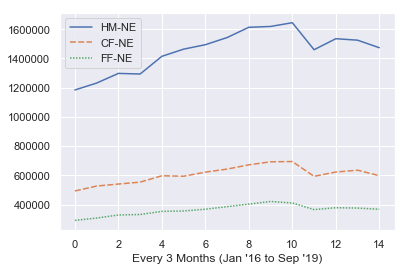

In [37]:
sns.lineplot(data=three_mon_grouped_mean[monthly_ne_mask])
three_mon_grouped_mean[monthly_ne_mask]

,HM-NW,CF-NW,FF-NW
Every 3 Months (Jan '16 to Sep '19),,,
0,1.150437e+06,485708.333333,287609.000000
1,1.192181e+06,496504.000000,297902.000000
2,1.260380e+06,518104.333333,314951.000000
3,1.288531e+06,530024.000000,318014.333333
4,1.387570e+06,562785.000000,351453.333333
5,1.379651e+06,590140.666667,340198.333333
6,1.446175e+06,610326.666667,366420.666667
7,1.497176e+06,624230.333333,369572.000000
8,1.586477e+06,652095.666667,391433.333333


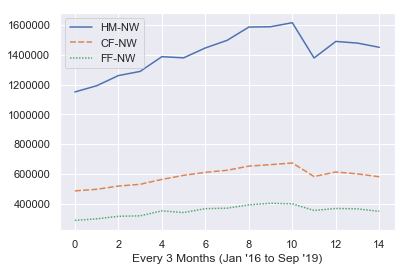

In [38]:
sns.lineplot(data=three_mon_grouped_mean[monthly_nw_mask])
three_mon_grouped_mean[monthly_nw_mask]

,HM-SE,CF-SE,FF-SE
Every 3 Months (Jan '16 to Sep '19),,,
0,1.131981e+06,471658.666667,283038.000000
1,1.188855e+06,495150.666667,289263.000000
2,1.261600e+06,518481.333333,311088.333333
3,1.252489e+06,535993.000000,321595.666667
4,1.366885e+06,569342.000000,332622.666667
5,1.375701e+06,558068.333333,343864.333333
6,1.419401e+06,607235.666667,359544.333333
7,1.459499e+06,607696.000000,369770.000000
8,1.541739e+06,642594.333333,380625.000000


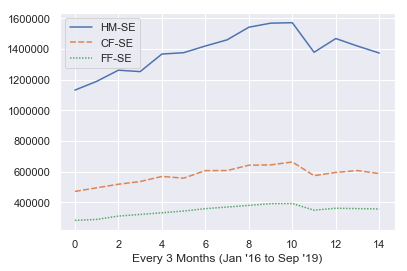

In [39]:
sns.lineplot(data=three_mon_grouped_mean[monthly_se_mask])
three_mon_grouped_mean[monthly_se_mask]

,HM-SW,CF-SW,FF-SW
Every 3 Months (Jan '16 to Sep '19),,,
0,1.181859e+06,485902.000000,287552.666667
1,1.225737e+06,504113.333333,302467.666667
2,1.298827e+06,534263.000000,324583.666667
3,1.323376e+06,537127.666667,326574.000000
4,1.388743e+06,586341.333333,351804.333333
5,1.425934e+06,578438.000000,356419.000000
6,1.471602e+06,629349.000000,367534.333333
7,1.520537e+06,616602.000000,385061.333333
8,1.585638e+06,643475.333333,391156.000000


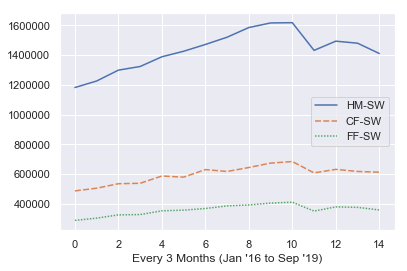

In [40]:
sns.lineplot(data=three_mon_grouped_mean[monthly_sw_mask])
three_mon_grouped_mean[monthly_sw_mask]

,HM-C,CF-C,FF-C
Every 3 Months (Jan '16 to Sep '19),,,
0,1.134482e+06,466565.000000,283576.000000
1,1.140615e+06,475256.000000,296792.333333
2,1.243034e+06,518195.333333,315019.333333
3,1.233764e+06,513931.333333,312568.000000
4,1.328059e+06,553217.333333,340850.333333
5,1.353816e+06,564189.333333,343028.000000
6,1.399736e+06,591336.000000,354545.666667
7,1.455992e+06,598626.333333,368672.666667
8,1.517449e+06,624172.000000,379466.666667


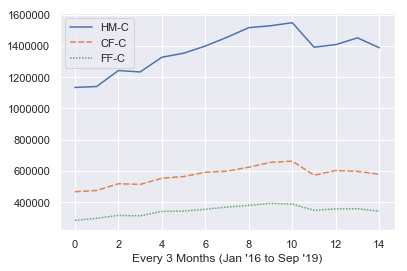

In [41]:
sns.lineplot(data=three_mon_grouped_mean[monthly_c_mask])
three_mon_grouped_mean[monthly_c_mask]

# Pie charts

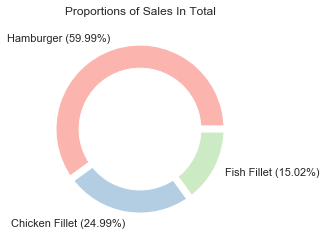

In [47]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
pie_data = monthly_df[['Total Hamburger', 'Total Chicken Fillet', 'Total Fish Fillet']].sum()
labels = ['Hamburger', 'Chicken Fillet', 'Fish Fillet']
for label in range(pie_data.shape[0]):
    labels[label] += ' (' + str((pie_data[label] / pie_data.sum() * 100).round(2)) + '%)'
plt.pie(pie_data,
        labels=labels,
        colors=Pastel1_7.hex_colors,
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title("Proportions of Sales In Total")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

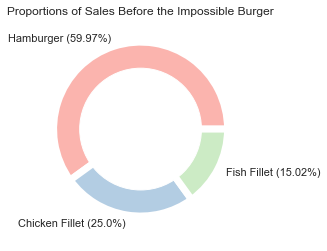

In [44]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
pie_data = monthly_df.iloc[:33][['Total Hamburger', 'Total Chicken Fillet', 'Total Fish Fillet']].sum()
labels = ['Hamburger', 'Chicken Fillet', 'Fish Fillet']
for label in range(pie_data.shape[0]):
    labels[label] += ' (' + str((pie_data[label] / pie_data.sum() * 100).round(2)) + '%)'
plt.pie(pie_data,
        labels=labels,
        colors=Pastel1_7.hex_colors,
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title("Proportions of Sales Before the Impossible Burger")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

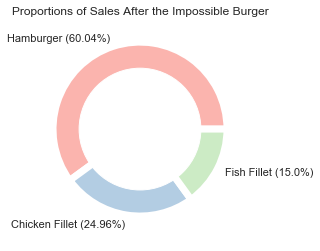

In [45]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
pie_data = monthly_df.iloc[33:][['Total Hamburger', 'Total Chicken Fillet', 'Total Fish Fillet']].sum()
labels = ['Hamburger', 'Chicken Fillet', 'Fish Fillet']
for label in range(pie_data.shape[0]):
    labels[label] += ' (' + str((pie_data[label] / pie_data.sum() * 100).round(2)) + '%)'
plt.pie(pie_data,
        labels=labels,
        colors=Pastel1_7.hex_colors,
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title("Proportions of Sales After the Impossible Burger")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()